In [83]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display

In [84]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year

p1_lat, p1_lon = 39.835694, -105.359097
p2_lat, p2_lon = 39.855119, -105.297783
p3_lat, p3_lon = 39.655210, -105.402332
p4_lat, p4_lon = 39.965930, -105.440591

# You must request an NSRDB api key from the link above
api_key = '1gHoGjlIGeXbQOpiunnlRrJS9vYYb490MA4n9X7s'
# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'air_temperature,solar_zenith_angle,dew_point,relative_humidity,surface_albedo,surface_pressure,total_precipitable_water,wind_speed,wind_direction,ghi,dhi,dni'
   
# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Sara+Abouelella'
# Your reason for using the NSRDB.
reason_for_use = 'interview'
# Your affiliation
your_affiliation = 'student'
# Your email address
your_email = 'sabouelella3@gatech.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p4_lat, lon=p4_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [85]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,148698,-,-,-,39.97,-105.46,-7,2529,-7,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,3.0.6


In [86]:
# Return all but first 2 lines of csv to get data:
df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p1_lat, lon=p1_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)

# Set the time index in the pandas dataframe:
df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
# df.set_index()
# take a look
print('shape:', df.shape)
df.head(8)
# print(df.iloc[2,:])

shape: (17520, 17)


,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,2010,1,1,0,0,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0
2010-01-01 00:30:00,2010,1,1,0,30,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0
2010-01-01 01:00:00,2010,1,1,1,0,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0
2010-01-01 01:30:00,2010,1,1,1,30,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0
2010-01-01 02:00:00,2010,1,1,2,0,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0
2010-01-01 02:30:00,2010,1,1,2,30,-9,145.08,-15,53.54,0.866,750,0.516,3.8,270.0,0,0,0
2010-01-01 03:00:00,2010,1,1,3,0,-9,139.51,-14,57.22,0.866,750,0.523,3.8,270.0,0,0,0
2010-01-01 03:30:00,2010,1,1,3,30,-9,133.81,-14,57.23,0.866,750,0.527,3.7,270.0,0,0,0


In [87]:
# df.insert(3, 'MonthDay', df['Month']*100+df['Day']*10+df['Minute'])
dff = df.drop(columns=['Year'], axis=1)

dff.head()

,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,1,1,0,0,-10,163.12,-16,59.53,0.866,750,0.479,3.8,267.3,0,0,0
2010-01-01 00:30:00,1,1,0,30,-10,162.32,-16,55.02,0.866,750,0.486,3.8,267.3,0,0,0
2010-01-01 01:00:00,1,1,1,0,-10,159.50,-16,55.62,0.866,750,0.493,3.9,268.8,0,0,0
2010-01-01 01:30:00,1,1,1,30,-9,155.34,-16,55.63,0.866,750,0.501,3.9,268.8,0,0,0
2010-01-01 02:00:00,1,1,2,0,-9,150.42,-15,57.88,0.866,750,0.509,3.9,270.0,0,0,0


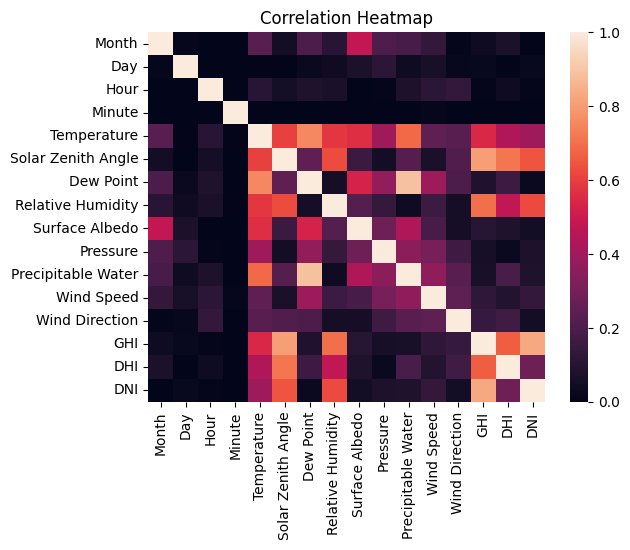

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = abs(dff.corr())
heatmap = sns.heatmap(abs(corr_matrix))
plt.title('Correlation Heatmap')
plt.show()

In [89]:
# win_size = 8
# X = np.zeros((dff.shape[0] - win_size, win_size * dff.shape[1]))
# Y = np.zeros((dff.shape[0] - win_size, 1))
# print("Feature array size:{}, Labels array size{}".format(X.shape, Y.shape))
# for i in range(X.shape[0]):
#     chunk_x = dff.iloc[i:i+win_size, :].to_numpy()
#     chunk_y = dff.iloc[i+win_size, -1]
#     X[i] = np.reshape(chunk_x, (1, dff.shape[1] * win_size))
#     Y[i]= chunk_y
    # if i == 5:
    #     print("X = ", X[0])
    #     print("Y = ", Y[0])

In [90]:
X = dff.iloc[:, :-1]
Y = dff.iloc[:, -1]
print("Features array size: ", X.shape)
print("Labels array size: ", Y.shape)

Features array size:  (17520, 15)
Labels array size:  (17520,)


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

trainX, testX, trainY, testY = train_test_split(X, Y, test_size= 1 - train_ratio)

# Genearate ValX, TestX, ValY and TestY
valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

sc=StandardScaler()
scaler = sc.fit(trainX)

trainX_scaled = scaler.transform(trainX)
valX_scaled = scaler.transform(valX)
testX_scaled = scaler.transform(testX)

print(trainX_scaled.shape)
print(valX_scaled.shape)
print(testX_scaled.shape)


(12263, 15)
(2628, 15)
(2629, 15)


In [92]:
input_shape = trainX.shape[1]
n_batch_size = 128

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)
n_epochs = 120


print('Input Shape:{} '.format(input_shape))
print('Batch Size:{}'.format(n_batch_size))
print('Steps per Epoch:{}'.format(n_steps_per_epoch))
print('Validation Steps:{}'.format(n_validation_steps))
print('Test Steps:{}'.format(n_test_steps))
print('Number of Epochs:{}'.format(n_epochs))


Input Shape:15 
Batch Size:128
Steps per Epoch:95
Validation Steps:20
Test Steps:20
Number of Epochs:120


In [93]:
import os
import shutil
import pickle as pk

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 64)                1024      
                                                                 
 dense_67 (Dense)            (None, 64)                4160      
                                                                 
 dense_68 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5249 (20.50 KB)
Trainable params: 5249 (20.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# Prepare a directory to store all the checkpoints.
checkpoint_no = 'ckpt_1_ANN'
model_name = 'dnl_forcast_ANN'
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, monitor='val_loss', save_best_only=True, mode='auto')]

history = model.fit(trainX_scaled,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

Epoch 1/120
 1/95 [..............................] - ETA: 16s - loss: 205289.5469 - mae: 261.9539INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 3ms/step - loss: 186238.5312 - mae: 246.8657 - val_loss: 172209.3438 - val_mae: 238.1364
Epoch 2/120
 1/95 [..............................] - ETA: 0s - loss: 160892.6094 - mae: 223.1954INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 158401.6562 - mae: 233.3485 - val_loss: 131505.0938 - val_mae: 216.3326
Epoch 3/120
 1/95 [..............................] - ETA: 0s - loss: 150373.7812 - mae: 235.1089INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 108627.4141 - mae: 207.7228 - val_loss: 79647.0078 - val_mae: 189.4801
Epoch 4/120
 1/95 [..............................] - ETA: 0s - loss: 73973.7031 - mae: 181.8181INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 65450.9883 - mae: 181.6438 - val_loss: 54274.1172 - val_mae: 169.4672
Epoch 5/120
 1/95 [..............................] - ETA: 0s - loss: 49112.8047 - mae: 159.5946INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 50015.8711 - mae: 162.6373 - val_loss: 45094.3516 - val_mae: 153.1263
Epoch 6/120
 1/95 [..............................] - ETA: 0s - loss: 41916.3750 - mae: 141.9770INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 42132.0156 - mae: 147.6372 - val_loss: 37587.9219 - val_mae: 139.3363
Epoch 7/120
 1/95 [..............................] - ETA: 0s - loss: 35692.2344 - mae: 135.8456INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 34965.7695 - mae: 133.3392 - val_loss: 31047.9941 - val_mae: 125.5363
Epoch 8/120
 1/95 [..............................] - ETA: 0s - loss: 33492.0312 - mae: 126.8675INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 29079.9941 - mae: 120.9314 - val_loss: 25275.6016 - val_mae: 111.5799
Epoch 9/120
 1/95 [..............................] - ETA: 0s - loss: 24999.0039 - mae: 106.7566INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 23418.3965 - mae: 106.7633 - val_loss: 20665.5020 - val_mae: 99.6159
Epoch 10/120
 1/95 [..............................] - ETA: 0s - loss: 20065.2188 - mae: 99.1434INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 19441.3789 - mae: 98.2600 - val_loss: 17258.6758 - val_mae: 93.1209
Epoch 11/120
 1/95 [..............................] - ETA: 0s - loss: 14890.8037 - mae: 87.8536INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 16288.5117 - mae: 89.8607 - val_loss: 14638.8535 - val_mae: 85.9838
Epoch 12/120
 1/95 [..............................] - ETA: 0s - loss: 13998.0254 - mae: 85.0997INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 13981.6992 - mae: 83.4597 - val_loss: 12471.5068 - val_mae: 78.7070
Epoch 13/120
 1/95 [..............................] - ETA: 0s - loss: 13327.1357 - mae: 79.9333INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 11710.4072 - mae: 75.5175 - val_loss: 10471.8779 - val_mae: 72.2242
Epoch 14/120
 1/95 [..............................] - ETA: 0s - loss: 12879.7021 - mae: 81.1035INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 4ms/step - loss: 9818.3574 - mae: 68.4175 - val_loss: 8559.5312 - val_mae: 64.5156
Epoch 15/120
 1/95 [..............................] - ETA: 0s - loss: 11060.8262 - mae: 76.2358INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 8158.5503 - mae: 61.6245 - val_loss: 7028.0952 - val_mae: 57.0124
Epoch 16/120
 1/95 [..............................] - ETA: 0s - loss: 5733.6743 - mae: 49.1812INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 6636.5898 - mae: 54.9531 - val_loss: 5728.8042 - val_mae: 51.5017
Epoch 17/120
 1/95 [..............................] - ETA: 0s - loss: 7108.3477 - mae: 54.0945INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 5529.7695 - mae: 49.6910 - val_loss: 4764.1846 - val_mae: 46.9927
Epoch 18/120
 1/95 [..............................] - ETA: 0s - loss: 3989.3611 - mae: 40.9949INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 4484.7393 - mae: 44.4697 - val_loss: 3933.4653 - val_mae: 41.8245
Epoch 19/120
 1/95 [..............................] - ETA: 0s - loss: 5748.5503 - mae: 45.0997INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 3872.2209 - mae: 41.0072 - val_loss: 3367.0188 - val_mae: 39.8769
Epoch 20/120
 1/95 [..............................] - ETA: 0s - loss: 4383.1333 - mae: 43.3972INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 3260.2146 - mae: 37.7738 - val_loss: 2838.6108 - val_mae: 34.9037
Epoch 21/120
 1/95 [..............................] - ETA: 0s - loss: 4571.3042 - mae: 43.0973INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 2802.0854 - mae: 34.6081 - val_loss: 2579.7559 - val_mae: 34.0003
Epoch 22/120
 1/95 [..............................] - ETA: 0s - loss: 2453.7808 - mae: 31.3317INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 2500.5198 - mae: 32.4640 - val_loss: 2212.8335 - val_mae: 30.9847
Epoch 23/120
 1/95 [..............................] - ETA: 0s - loss: 1515.7355 - mae: 28.7949INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 2175.5225 - mae: 30.1537 - val_loss: 1963.6052 - val_mae: 28.6201
Epoch 24/120
 1/95 [..............................] - ETA: 0s - loss: 2453.4062 - mae: 31.7358INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 1952.2312 - mae: 28.4153 - val_loss: 1817.9453 - val_mae: 27.0045
Epoch 25/120
 1/95 [..............................] - ETA: 0s - loss: 1646.9453 - mae: 25.5449INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 1788.6362 - mae: 27.0954 - val_loss: 1674.4861 - val_mae: 26.9872
Epoch 26/120
 1/95 [..............................] - ETA: 0s - loss: 1184.1755 - mae: 23.1859INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 1633.2963 - mae: 26.0587 - val_loss: 1497.7158 - val_mae: 24.5690
Epoch 27/120
 1/95 [..............................] - ETA: 0s - loss: 1471.7217 - mae: 26.0478INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 1514.5428 - mae: 24.9466 - val_loss: 1389.5846 - val_mae: 23.2881
Epoch 28/120
 1/95 [..............................] - ETA: 0s - loss: 771.8157 - mae: 19.9724INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 1433.6367 - mae: 24.2550 - val_loss: 1317.4932 - val_mae: 23.0952
Epoch 29/120
 1/95 [..............................] - ETA: 0s - loss: 1348.0645 - mae: 23.0546INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 1287.3887 - mae: 23.1015 - val_loss: 1203.1047 - val_mae: 21.4286
Epoch 30/120
 1/95 [..............................] - ETA: 0s - loss: 1092.5231 - mae: 20.9149INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 1222.0255 - mae: 22.3922 - val_loss: 1162.6525 - val_mae: 21.4980
Epoch 31/120
 1/95 [..............................] - ETA: 0s - loss: 888.5223 - mae: 19.0540INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 1166.9598 - mae: 21.8154 - val_loss: 1131.6367 - val_mae: 22.0659
Epoch 32/120
 1/95 [..............................] - ETA: 0s - loss: 1372.7296 - mae: 23.3934INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 1091.9375 - mae: 21.3446 - val_loss: 1063.2253 - val_mae: 20.6326
Epoch 33/120
 1/95 [..............................] - ETA: 0s - loss: 825.5143 - mae: 18.6641INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 1076.3209 - mae: 20.9170 - val_loss: 973.0657 - val_mae: 19.6516
Epoch 34/120
 1/95 [..............................] - ETA: 0s - loss: 695.9984 - mae: 18.1841INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 985.9195 - mae: 20.3649 - val_loss: 970.3861 - val_mae: 20.7816
Epoch 35/120
 1/95 [..............................] - ETA: 0s - loss: 1106.0992 - mae: 22.9843INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 954.2339 - mae: 19.8992 - val_loss: 913.5960 - val_mae: 19.7954
Epoch 36/120
95/95 [==============================] - 0s 625us/step - loss: 923.8867 - mae: 19.4566 - val_loss: 913.7368 - val_mae: 20.5391
Epoch 37/120
 1/95 [..............................] - ETA: 0s - loss: 1146.2360 - mae: 19.4210INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 4ms/step - loss: 901.2460 - mae: 19.3585 - val_loss: 837.8176 - val_mae: 19.0295
Epoch 38/120
 1/95 [..............................] - ETA: 0s - loss: 768.3873 - mae: 17.5386INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 856.2102 - mae: 18.7457 - val_loss: 815.1476 - val_mae: 18.3457
Epoch 39/120
 1/95 [..............................] - ETA: 0s - loss: 589.9384 - mae: 17.2828INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 794.9427 - mae: 18.2942 - val_loss: 752.0307 - val_mae: 17.1491
Epoch 40/120
95/95 [==============================] - 0s 616us/step - loss: 793.9120 - mae: 18.1709 - val_loss: 789.4511 - val_mae: 18.3260
Epoch 41/120
 1/95 [..............................] - ETA: 0s - loss: 1125.4719 - mae: 20.3016INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 757.2219 - mae: 17.8647 - val_loss: 706.8212 - val_mae: 16.8044
Epoch 42/120
 1/95 [..............................] - ETA: 0s - loss: 766.6619 - mae: 17.2563INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 747.1640 - mae: 17.5581 - val_loss: 683.9175 - val_mae: 15.9945
Epoch 43/120
95/95 [==============================] - 0s 643us/step - loss: 712.5182 - mae: 17.3463 - val_loss: 684.8973 - val_mae: 16.1169
Epoch 44/120
95/95 [==============================] - 0s 622us/step - loss: 705.3874 - mae: 17.0451 - val_loss: 707.9451 - val_mae: 17.5146
Epoch 45/120
 1/95 [..............................] - ETA: 0s - loss: 668.2872 - mae: 17.7020INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 670.2169 - mae: 16.7526 - val_loss: 650.6348 - val_mae: 16.4020
Epoch 46/120
 1/95 [..............................] - ETA: 0s - loss: 602.5831 - mae: 14.8114INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 668.3499 - mae: 16.8028 - val_loss: 631.1500 - val_mae: 15.3680
Epoch 47/120
 1/95 [..............................] - ETA: 0s - loss: 677.5801 - mae: 16.9850INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 649.4653 - mae: 16.5290 - val_loss: 601.2897 - val_mae: 14.9541
Epoch 48/120
95/95 [==============================] - 0s 608us/step - loss: 613.7762 - mae: 16.1665 - val_loss: 682.9534 - val_mae: 18.8039
Epoch 49/120
95/95 [==============================] - 0s 613us/step - loss: 616.7432 - mae: 16.1551 - val_loss: 678.0598 - val_mae: 17.5816
Epoch 50/120
 1/95 [..............................] - ETA: 0s - loss: 510.6822 - mae: 16.6914INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 624.6323 - mae: 16.1101 - val_loss: 567.7614 - val_mae: 15.0301
Epoch 51/120
 1/95 [..............................] - ETA: 0s - loss: 444.8715 - mae: 14.0524INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 560.8197 - mae: 15.7162 - val_loss: 545.5687 - val_mae: 14.4533
Epoch 52/120
95/95 [==============================] - 0s 630us/step - loss: 597.8952 - mae: 15.7543 - val_loss: 556.9982 - val_mae: 15.3211
Epoch 53/120
 1/95 [..............................] - ETA: 0s - loss: 931.8821 - mae: 15.6822INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 573.1788 - mae: 15.4258 - val_loss: 513.3777 - val_mae: 13.7069
Epoch 54/120
95/95 [==============================] - 0s 643us/step - loss: 547.8427 - mae: 15.4197 - val_loss: 549.7880 - val_mae: 14.8318
Epoch 55/120
95/95 [==============================] - 0s 616us/step - loss: 537.2905 - mae: 15.0337 - val_loss: 554.2699 - val_mae: 15.1828
Epoch 56/120
 1/95 [..............................] - ETA: 0s - loss: 339.6220 - mae: 11.4850INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 559.8905 - mae: 15.3750 - val_loss: 508.6024 - val_mae: 14.3483
Epoch 57/120
 1/95 [..............................] - ETA: 0s - loss: 336.1811 - mae: 12.1679INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 531.6933 - mae: 14.9940 - val_loss: 496.4420 - val_mae: 13.8463
Epoch 58/120
95/95 [==============================] - 0s 631us/step - loss: 512.1933 - mae: 14.6217 - val_loss: 497.4257 - val_mae: 13.9665
Epoch 59/120
95/95 [==============================] - 0s 628us/step - loss: 509.2557 - mae: 14.8837 - val_loss: 508.2559 - val_mae: 14.8562
Epoch 60/120
 1/95 [..............................] - ETA: 0s - loss: 456.1891 - mae: 15.0661INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 519.5083 - mae: 14.9093 - val_loss: 466.2764 - val_mae: 13.2814
Epoch 61/120
95/95 [==============================] - 0s 611us/step - loss: 479.8073 - mae: 14.5610 - val_loss: 535.8122 - val_mae: 15.4834
Epoch 62/120
95/95 [==============================] - 0s 612us/step - loss: 488.8543 - mae: 14.3093 - val_loss: 611.1734 - val_mae: 17.6743
Epoch 63/120
 1/95 [..............................] - ETA: 0s - loss: 899.1395 - mae: 19.8478INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 489.6457 - mae: 14.3940 - val_loss: 461.6537 - val_mae: 13.5410
Epoch 64/120
 1/95 [..............................] - ETA: 0s - loss: 811.1360 - mae: 15.6920INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 461.6682 - mae: 14.1935 - val_loss: 456.6820 - val_mae: 13.7448
Epoch 65/120
95/95 [==============================] - 0s 608us/step - loss: 458.8546 - mae: 14.0077 - val_loss: 461.2099 - val_mae: 13.6295
Epoch 66/120
 1/95 [..............................] - ETA: 0s - loss: 393.0763 - mae: 14.2491INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 479.6543 - mae: 14.3422 - val_loss: 453.2707 - val_mae: 13.4087
Epoch 67/120
 1/95 [..............................] - ETA: 0s - loss: 518.1184 - mae: 12.2145INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 451.3361 - mae: 14.0874 - val_loss: 416.2350 - val_mae: 12.2371
Epoch 68/120
95/95 [==============================] - 0s 622us/step - loss: 441.6300 - mae: 13.8478 - val_loss: 555.6956 - val_mae: 17.6341
Epoch 69/120
 1/95 [..............................] - ETA: 0s - loss: 668.7200 - mae: 18.6749INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 454.1799 - mae: 13.7829 - val_loss: 411.4803 - val_mae: 12.5674
Epoch 70/120
 1/95 [..............................] - ETA: 0s - loss: 310.3885 - mae: 12.2120INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 416.7766 - mae: 13.8101 - val_loss: 405.8725 - val_mae: 11.7888
Epoch 71/120
 1/95 [..............................] - ETA: 0s - loss: 634.1844 - mae: 11.9429INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 441.3985 - mae: 13.5628 - val_loss: 395.8547 - val_mae: 11.7316
Epoch 72/120
95/95 [==============================] - 0s 640us/step - loss: 432.5961 - mae: 13.5472 - val_loss: 438.8639 - val_mae: 13.8899
Epoch 73/120
 1/95 [..............................] - ETA: 0s - loss: 336.3906 - mae: 12.7420INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 424.6280 - mae: 13.6009 - val_loss: 394.9521 - val_mae: 12.4525
Epoch 74/120
 1/95 [..............................] - ETA: 0s - loss: 164.1964 - mae: 9.0708INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 3ms/step - loss: 420.2375 - mae: 13.5418 - val_loss: 389.2524 - val_mae: 12.3164
Epoch 75/120
95/95 [==============================] - 0s 593us/step - loss: 407.3612 - mae: 13.3549 - val_loss: 471.0142 - val_mae: 15.5581
Epoch 76/120
 1/95 [..............................] - ETA: 0s - loss: 308.0861 - mae: 14.3081INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 409.5648 - mae: 13.3279 - val_loss: 386.4605 - val_mae: 12.0393
Epoch 77/120
 1/95 [..............................] - ETA: 0s - loss: 278.3457 - mae: 12.0265INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 413.2989 - mae: 13.3512 - val_loss: 375.0550 - val_mae: 12.2145
Epoch 78/120
95/95 [==============================] - 0s 601us/step - loss: 391.9977 - mae: 12.9139 - val_loss: 375.6478 - val_mae: 12.0474
Epoch 79/120
95/95 [==============================] - 0s 606us/step - loss: 387.4217 - mae: 13.1402 - val_loss: 413.8414 - val_mae: 13.5088
Epoch 80/120
95/95 [==============================] - 0s 607us/step - loss: 403.8120 - mae: 13.3082 - val_loss: 522.6631 - val_mae: 16.5579
Epoch 81/120
95/95 [==============================] - 0s 603us/step - loss: 377.2907 - mae: 12.8467 - val_loss: 419.5261 - val_mae: 13.8422
Epoch 82/120
 1/95 [..............................] - ETA: 0s - loss: 1058.4724 - mae: 16.4252INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 384.2392 - mae: 12.7276 - val_loss: 360.2014 - val_mae: 11.7530
Epoch 83/120
95/95 [==============================] - 0s 610us/step - loss: 367.5782 - mae: 12.7904 - val_loss: 367.4543 - val_mae: 12.3783
Epoch 84/120
95/95 [==============================] - 0s 607us/step - loss: 377.8029 - mae: 13.0208 - val_loss: 405.1989 - val_mae: 13.5734
Epoch 85/120
 1/95 [..............................] - ETA: 0s - loss: 304.6132 - mae: 13.5090INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 372.5961 - mae: 12.6253 - val_loss: 324.7247 - val_mae: 10.7523
Epoch 86/120
95/95 [==============================] - 0s 610us/step - loss: 356.5289 - mae: 12.7020 - val_loss: 416.9613 - val_mae: 14.1213
Epoch 87/120
95/95 [==============================] - 0s 610us/step - loss: 372.2338 - mae: 12.7629 - val_loss: 343.9587 - val_mae: 11.4948
Epoch 88/120
 1/95 [..............................] - ETA: 0s - loss: 179.9514 - mae: 9.9825INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 358.2717 - mae: 12.6814 - val_loss: 324.3150 - val_mae: 10.8645
Epoch 89/120
 1/95 [..............................] - ETA: 0s - loss: 279.3668 - mae: 10.7744INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 355.9037 - mae: 12.5438 - val_loss: 321.1025 - val_mae: 10.8980
Epoch 90/120
95/95 [==============================] - 0s 618us/step - loss: 355.3857 - mae: 12.5450 - val_loss: 363.8178 - val_mae: 12.7082
Epoch 91/120
95/95 [==============================] - 0s 623us/step - loss: 347.1338 - mae: 12.2324 - val_loss: 363.7800 - val_mae: 12.5113
Epoch 92/120
95/95 [==============================] - 0s 615us/step - loss: 343.0297 - mae: 12.2547 - val_loss: 577.4366 - val_mae: 18.1044
Epoch 93/120
95/95 [==============================] - 0s 612us/step - loss: 348.1499 - mae: 12.5228 - val_loss: 399.5506 - val_mae: 14.3155
Epoch 94/120
95/95 [==============================] - 0s 611us/step - loss: 340.2978 - mae: 12.3077 - val_loss: 381.5325 - val_mae: 13.2462
Epoch 95/120
 1/95 [..............................] - ETA: 0s - loss: 595.7864 - mae: 15.6358INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 341.2421 - mae: 12.1649 - val_loss: 301.2487 - val_mae: 10.5906
Epoch 96/120
95/95 [==============================] - 0s 605us/step - loss: 334.5120 - mae: 12.2824 - val_loss: 363.4308 - val_mae: 12.9750
Epoch 97/120
95/95 [==============================] - 0s 609us/step - loss: 333.3970 - mae: 12.2166 - val_loss: 316.5945 - val_mae: 11.6392
Epoch 98/120
95/95 [==============================] - 0s 616us/step - loss: 334.9667 - mae: 12.2368 - val_loss: 315.8642 - val_mae: 11.6413
Epoch 99/120
95/95 [==============================] - 0s 608us/step - loss: 331.3796 - mae: 12.1561 - val_loss: 377.8800 - val_mae: 13.1306
Epoch 100/120
 1/95 [..............................] - ETA: 0s - loss: 393.3197 - mae: 14.1872INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 330.1833 - mae: 12.1355 - val_loss: 292.1326 - val_mae: 10.3179
Epoch 101/120
57/95 [=================>............] - ETA: 0s - loss: 333.2024 - mae: 12.1605INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 325.9707 - mae: 12.1153 - val_loss: 287.4696 - val_mae: 9.9520
Epoch 102/120
 1/95 [..............................] - ETA: 0s - loss: 131.4496 - mae: 7.4507INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 324.4794 - mae: 11.9082 - val_loss: 283.5799 - val_mae: 10.3063
Epoch 103/120
95/95 [==============================] - 0s 632us/step - loss: 320.5102 - mae: 11.9405 - val_loss: 293.8571 - val_mae: 10.6548
Epoch 104/120
95/95 [==============================] - 0s 654us/step - loss: 319.0296 - mae: 12.0376 - val_loss: 287.6084 - val_mae: 10.5701
Epoch 105/120
95/95 [==============================] - 0s 659us/step - loss: 312.7851 - mae: 11.7632 - val_loss: 289.9217 - val_mae: 10.7088
Epoch 106/120
95/95 [==============================] - 0s 663us/step - loss: 315.9722 - mae: 11.9375 - val_loss: 305.7651 - val_mae: 11.3919
Epoch 107/120
 1/95 [..............................] - ETA: 0s - loss: 153.2220 - mae: 8.9880INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 326.8016 - mae: 11.9671 - val_loss: 281.3640 - val_mae: 10.2600
Epoch 108/120
95/95 [==============================] - 0s 650us/step - loss: 287.9102 - mae: 11.4466 - val_loss: 301.6710 - val_mae: 11.5254
Epoch 109/120
 1/95 [..............................] - ETA: 0s - loss: 849.1061 - mae: 14.0215INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 329.0441 - mae: 12.0101 - val_loss: 271.9166 - val_mae: 9.8633
Epoch 110/120
 1/95 [..............................] - ETA: 0s - loss: 222.8870 - mae: 10.0355INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 301.0939 - mae: 11.6245 - val_loss: 265.9126 - val_mae: 9.7470
Epoch 111/120
 1/95 [..............................] - ETA: 0s - loss: 158.0358 - mae: 8.7601INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 302.6100 - mae: 11.7296 - val_loss: 260.5922 - val_mae: 9.5081
Epoch 112/120
95/95 [==============================] - 0s 610us/step - loss: 299.7818 - mae: 11.5475 - val_loss: 416.1352 - val_mae: 14.8436
Epoch 113/120
95/95 [==============================] - 0s 625us/step - loss: 289.5749 - mae: 11.3701 - val_loss: 264.2334 - val_mae: 10.0234
Epoch 114/120
95/95 [==============================] - 0s 633us/step - loss: 322.9323 - mae: 11.9211 - val_loss: 328.8117 - val_mae: 12.2152
Epoch 115/120
95/95 [==============================] - 0s 637us/step - loss: 289.7023 - mae: 11.3975 - val_loss: 384.7028 - val_mae: 13.7714
Epoch 116/120
95/95 [==============================] - 0s 632us/step - loss: 296.1424 - mae: 11.5964 - val_loss: 263.2724 - val_mae: 9.6778
Epoch 117/120
95/95 [==============================] - 0s 638us/step - loss: 291.5349 - mae: 11.3728 - val_loss: 298.8521 - val_mae: 11.4732
Epoch 118/120
95/95 [==========

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN/assets


95/95 [==============================] - 0s 2ms/step - loss: 293.5359 - mae: 11.2518 - val_loss: 246.3918 - val_mae: 9.0605
Epoch 120/120
95/95 [==============================] - 0s 618us/step - loss: 281.2029 - mae: 11.3722 - val_loss: 254.8957 - val_mae: 9.6860


In [95]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,mae,val_loss,val_mae
0,1,186238.531250,246.865723,172209.343750,238.136398
1,2,158401.656250,233.348480,131505.093750,216.332611
2,3,108627.414062,207.722763,79647.007812,189.480057
3,4,65450.988281,181.643845,54274.117188,169.467194
4,5,50015.871094,162.637344,45094.351562,153.126266


In [96]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,mae,val_loss,val_mae
118,119,293.535858,11.251813,246.3918,9.060496


In [97]:
pk.dump(scaler, open(checkpoint_no + '/' + 'scaler.pkl', 'wb'))

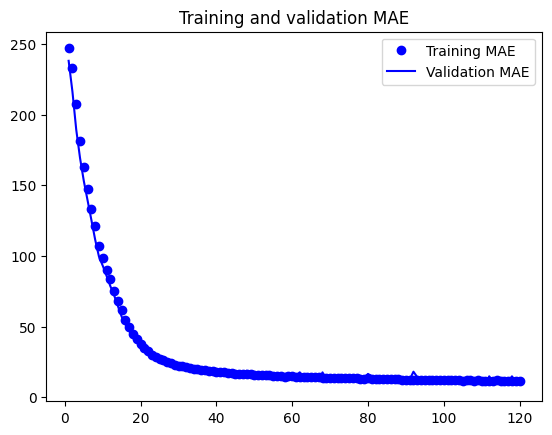

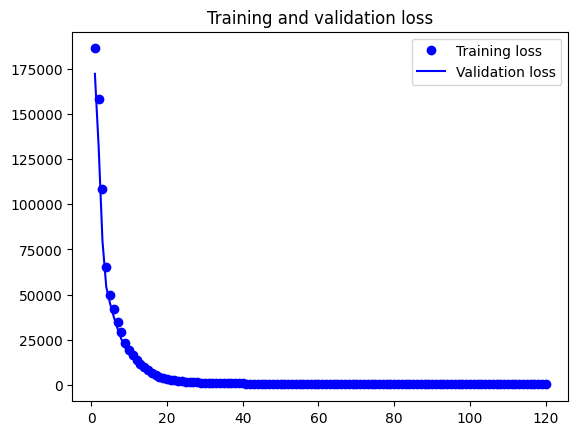

In [98]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [99]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [100]:
k = 5
num_val_samples = len(trainX) // k
all_scores = []
for i in range(k):
    print('Processing Fold', i)
    val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [trainX_scaled[:i * num_val_samples],
         trainX_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [trainY[:i * num_val_samples],
         trainY[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    print('MAE: ' + str(val_mae))
    print('========================')


Processing Fold 0


MAE: 11.91681957244873
Processing Fold 1
MAE: 8.945703506469727
Processing Fold 2
MAE: 12.387532234191895
Processing Fold 3
MAE: 8.152060508728027
Processing Fold 4
MAE: 9.531498908996582


In [101]:
for i, val in enumerate(all_scores):
    print('Fold ' + str(i) +': ' + 'MAE of', val)

print('Mean MAE of all folds: ' + str(np.mean(all_scores)))

Fold 0: MAE of 11.91681957244873
Fold 1: MAE of 8.945703506469727
Fold 2: MAE of 12.387532234191895
Fold 3: MAE of 8.152060508728027
Fold 4: MAE of 9.531498908996582
Mean MAE of all folds: 10.186722946166991


In [102]:
all_mae_histories = []
for i in range(k):
    print('Processing Fold', i)
    val_data = trainX_scaled[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = trainY[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [trainX_scaled[:i * num_val_samples],
         trainX_scaled[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [trainY[:i * num_val_samples],
         trainY[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [103]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(n_epochs)]

len(average_mae_history)

120

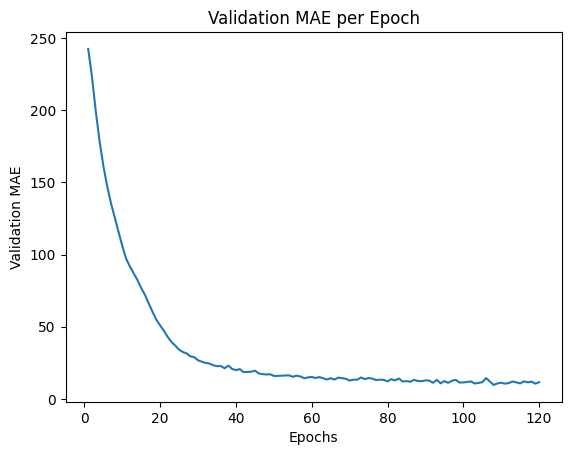

In [104]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [105]:
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)
best_model = load_model(model_name_temp)

/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [106]:
test_loss, test_mae = best_model.evaluate(testX_scaled, testY, steps=n_test_steps)
print()
print('Test MAE:', test_mae)

20/20 [==============================] - 0s 559us/step - loss: 216.2997 - mae: 8.7716

Test MAE: 8.77160358428955


In [107]:
y_pred = model.predict(testX_scaled)
y_pred[:5]

83/83 [==============================] - 0s 338us/step


array([[ 374.52332],
       [  -5.31682],
       [ 578.8653 ],
       [ -20.70949],
       [1057.7192 ]], dtype=float32)

In [108]:
df_testY = pd.DataFrame(testY)
df_y_pred = pd.DataFrame(y_pred)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

,Actual,Predicted
0,367,374.523315
1,0,-5.316820
2,581,578.865295
3,0,-20.709490
4,1037,1057.719238
...,...,...
2624,0,8.197737
2625,466,454.232513
2626,474,482.973633
2627,973,971.618042


In [109]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred))

Mean Absolute Error: 12.78945501606108
Mean Squared Error: 350.7798473086723
Root Mean Squared Error: 18.72911763294449
Mean Absolute Percentage Error: 2.844244701013504e+16


In [112]:
print("commite")

commite
